In [2]:
import numpy as np
import scipy as sp
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

#d = pd.read_csv('/Users/kevinlazatin/Desktop/all (1)/train_V2.csv')
test1 = pd.read_csv('/Users/kevinlazatin/Desktop/all (1)/test_V2.csv')

In [3]:
#sample the first 25000 rows to train data since file contains too much data for computer to run
df = pd.read_csv('/Users/kevinlazatin/Desktop/all (1)/train_V2.csv',sep = ",", low_memory = False, nrows = 25000)

In [4]:
#df.count()

In [5]:
#drop rows with missing values if any
df1 = df.dropna()

In [6]:
#df1

In [7]:
#d.count()

In [8]:
#d1.count()

In [9]:
#d1.dtypes

In [10]:
#d1

In [11]:
#combine distances together didn't work well with mae
#df["distance"] = df["rideDistance"]+df["walkDistance"]+df["swimDistance"]
#df.drop(['rideDistance','walkDistance','swimDistance'],inplace=True,axis=1)
#print(df.shape)
#df.head()

In [12]:
#combining distances didn't work well with mae
#test1["distance"] = test1["rideDistance"]+test1["walkDistance"]+test1["swimDistance"]
#test1.drop(['rideDistance','walkDistance','swimDistance'],inplace=True,axis=1)
#print(test1.shape)
#test1.head()

In [13]:
#df["winPlacePerc"] = df["winPlacePerc"].astype('int')

# for gradient boost
#df1["walkDistance"]=df1['walkDistance'].astype('int')
#df1["rideDistance"]=df1['rideDistance'].astype('int')
#df1["longestKill"]=df1['longestKill'].astype('int')
#df1["damageDealt"]=df1['damageDealt'].astype('int')
#df1["walkDistance"]=df1['walkDistance'].astype('int')
#df1["winPlacePerc"]=df1['winPlacePerc'].astype('int')

#took out walk + ride distance for distance #made mae worse for linregr
#adding swimDistance still got same mae score
#added other low positively correlated categories such a
# vehicleDestroys, numGroups, roadKills, teamKills,maxPlace,rankPoints,killPoints,winPoints
pred_cols = ['kills','weaponsAcquired','walkDistance','swimDistance','rideDistance','revives','longestKill','killStreaks',
            'headshotKills','heals','damageDealt','boosts','assists','DBNOs','vehicleDestroys','numGroups','roadKills',
            'teamKills','maxPlace','rankPoints','killPoints','winPoints']
y = df1.winPlacePerc

X_train, X_test, y_train, y_test = train_test_split(
    df1[pred_cols], y, test_size = .3, random_state=0)



In [14]:
#from sklearn.ensemble import GradientBoostingClassifier
#min_samples_split and max_depth didn't help

#gb = GradientBoostingClassifier(n_estimators = 10000, random_state = 0, learning_rate = .01)
#gb.fit(X_train, y_train)

#print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
#print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

In [15]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(regr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(regr.score(X_test, y_test)))

Accuracy on training set: 0.731
Accuracy on test set: 0.731


In [16]:
#took out walk + ride distance #made mae worse for linear regression
#adding swim distance, vehicleDestroys, numGroups, roadKills, teamKills,maxPlace,rankPoints,killPoints,winPoints
pred = ['kills','weaponsAcquired','walkDistance','rideDistance','swimDistance','revives','longestKill','killStreaks',
            'headshotKills','heals','damageDealt','boosts','assists','DBNOs','vehicleDestroys','numGroups','roadKills',
            'teamKills','maxPlace','rankPoints','killPoints','winPoints'] 
X_test1 = test1[pred]

In [17]:
from sklearn.metrics import mean_absolute_error as mae
#test_pred = gb.predict(X_test)
#Error = mae(test_pred, y_test)
#print("Mean Absolute Error of ", Error )

In [18]:
test_pred = regr.predict(X_test)
Error = mae(test_pred, y_test)
print("Mean Absolute Error of ", Error )

Mean Absolute Error of  0.1238450145594598


In [18]:
test_Y = regr.predict(X_test1)
Id = test1.Id
test = pd.DataFrame( {'Id': Id ,'winPlacePerc': test_Y } )
test.shape
test.head()
test.to_csv( 'pubg_pred.csv' , index = False)

In [19]:
df2 = pd.read_csv('/Users/kevinlazatin/Desktop/all (1)/train_V2.csv',sep = ",", low_memory = False, nrows = 300)
y1 = df2.winPlacePerc

In [20]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df2[pred_cols], y1, test_size = .3, random_state=0)

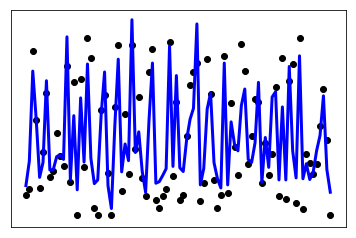

In [21]:
#takes too long with a lot of values
#shows how lin regr predicts with very small sample
t = df2.Id[:-210]
plt.scatter(t, y_test2,  color='black')
plt.plot(t, regr.predict(X_test2), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

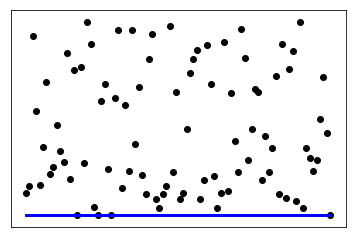

In [59]:
#shows how gb classifier predicts with very small sample
#t = df2.Id[:-210]
#plt.scatter(t, y_test2,  color='black')
#plt.plot(t, gb.predict(X_test2), color='blue',
         linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()